In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
tutorial_path = "drive/MyDrive/"
dependencies = f'{tutorial_path}dependencies_bwv846/'

1. Parse the MXL file

In [3]:
# installing libraries
!pip install music21 pitchtypes pandas
!apt install musescore3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  desktop-file-utils fonts-freefont-ttf libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0
  libmtdev1 libpoppler-qt5-1 libportaudio2 libportmidi0 libqt5core5a libqt5dbus5 libqt5gui5
  libqt5help5 libqt5network5 libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5qmlworkerscript5
  libqt5quick5 libqt5sql5 libqt5sql5-sqlite libqt5svg5 libqt5widgets5 libqt5xml5 libqt5xmlpatterns5
  libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0
  musescore-general-soundfont-small musescore3-common qml-module-qt-labs-folderlistmodel
  qml-module-qt-labs-settings qml-module-qtgraphicaleffects qml-module-qtqml
  qml-module-qtqml-models2 qml-module-qtquick-controls qml-module-qtquick-dialogs
  qml-module-qtquick-layouts 

In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("dependencies")

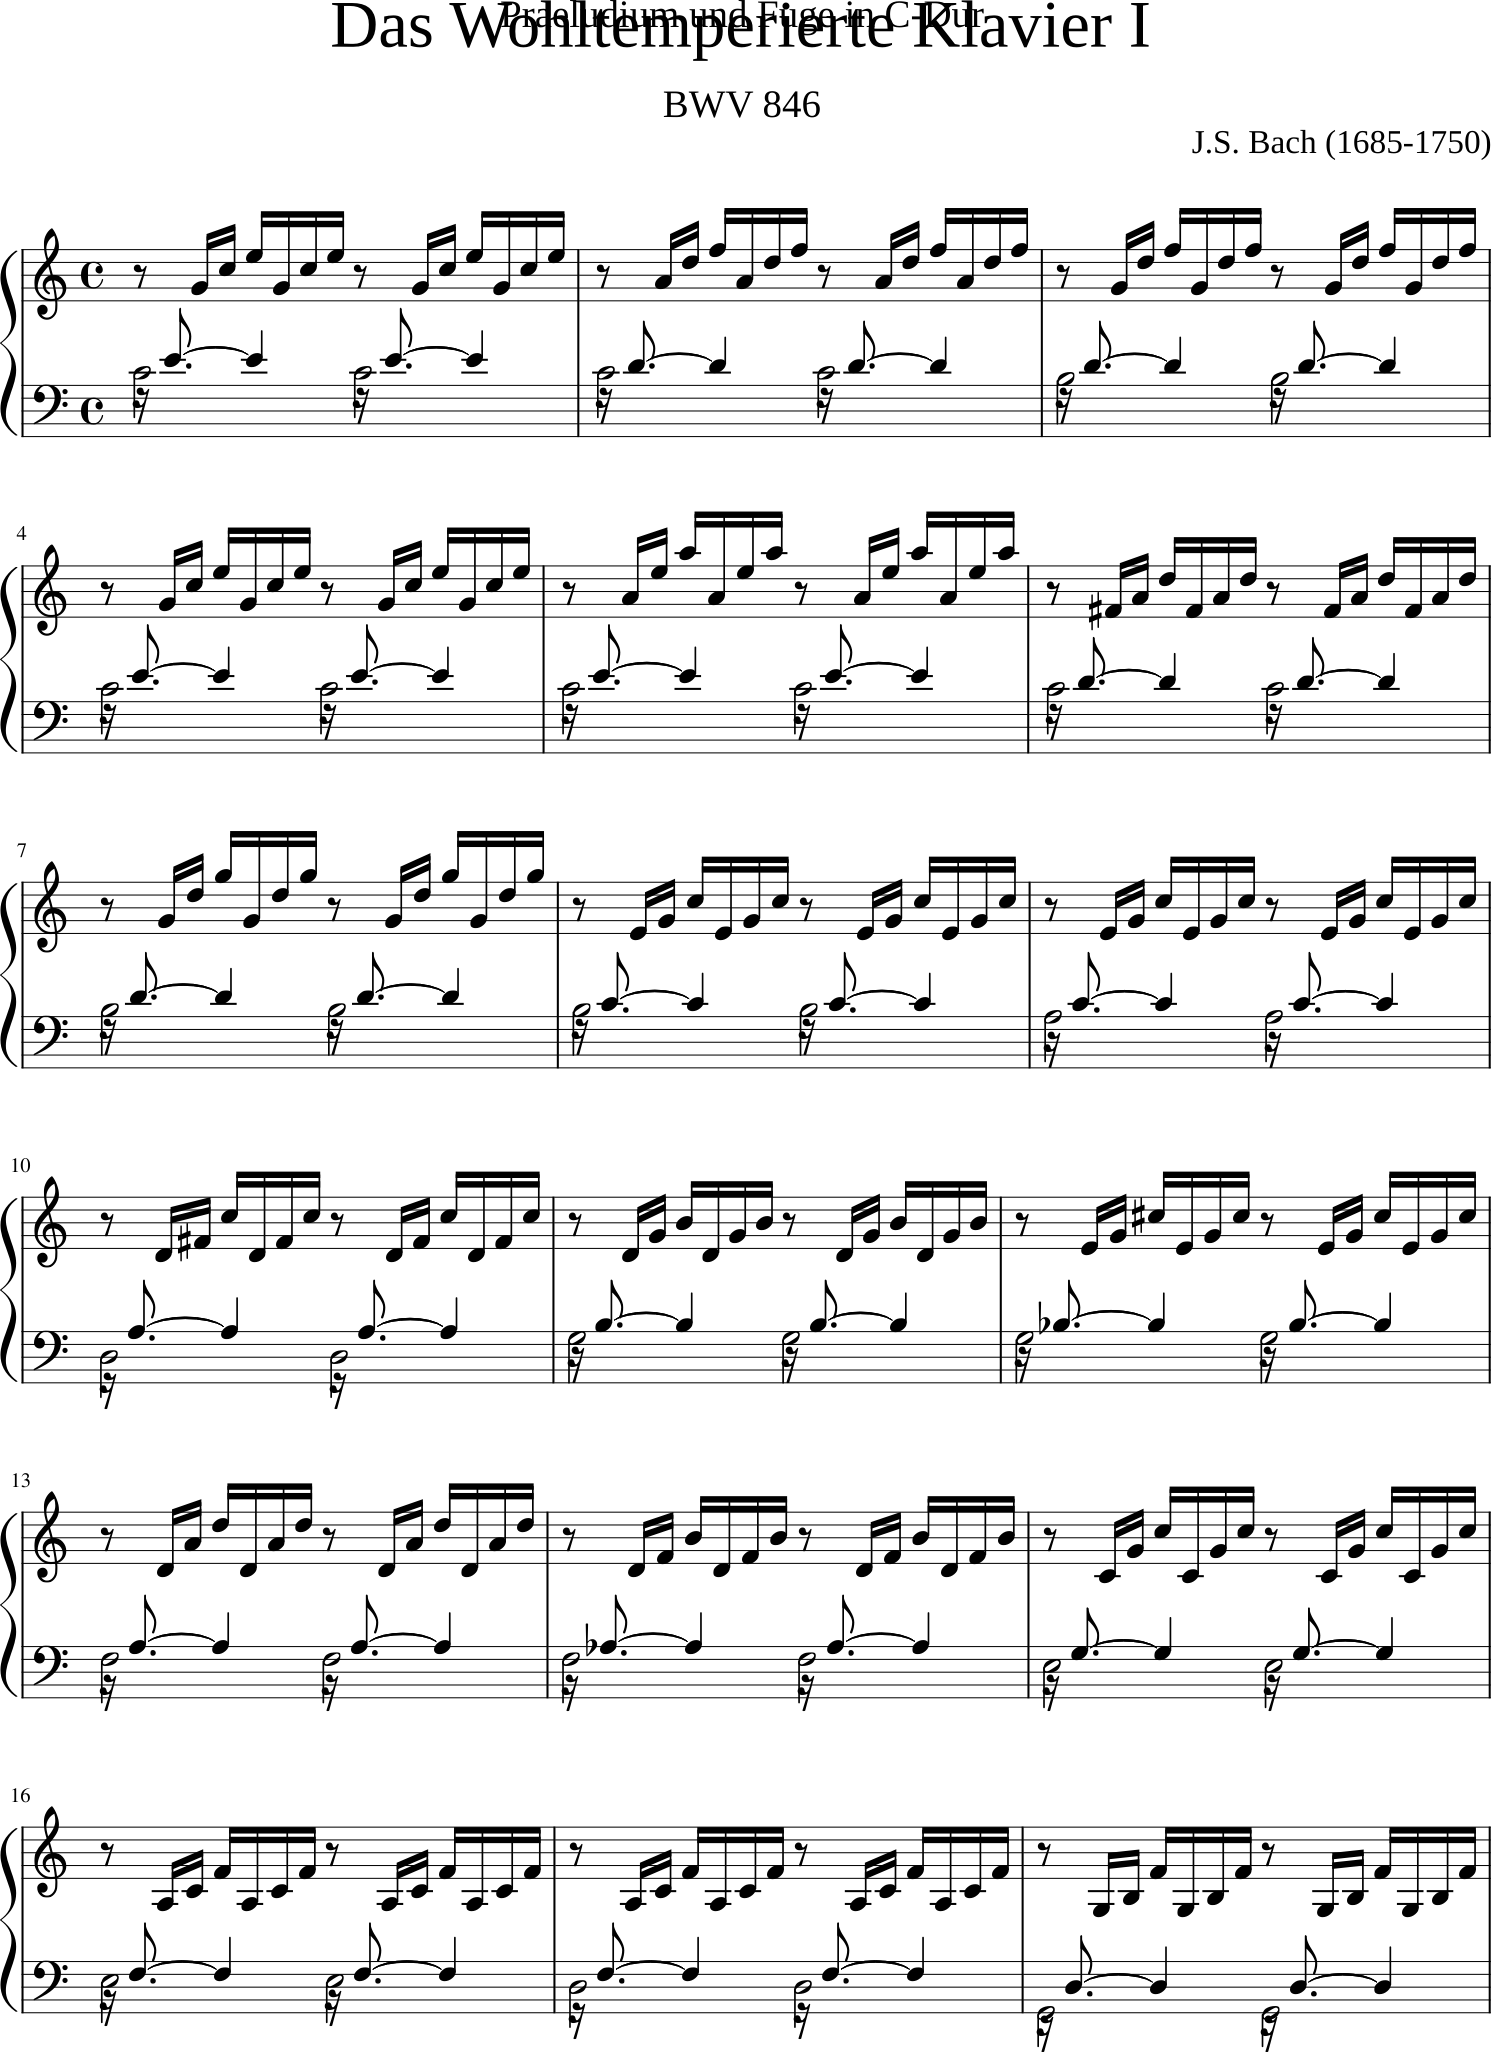

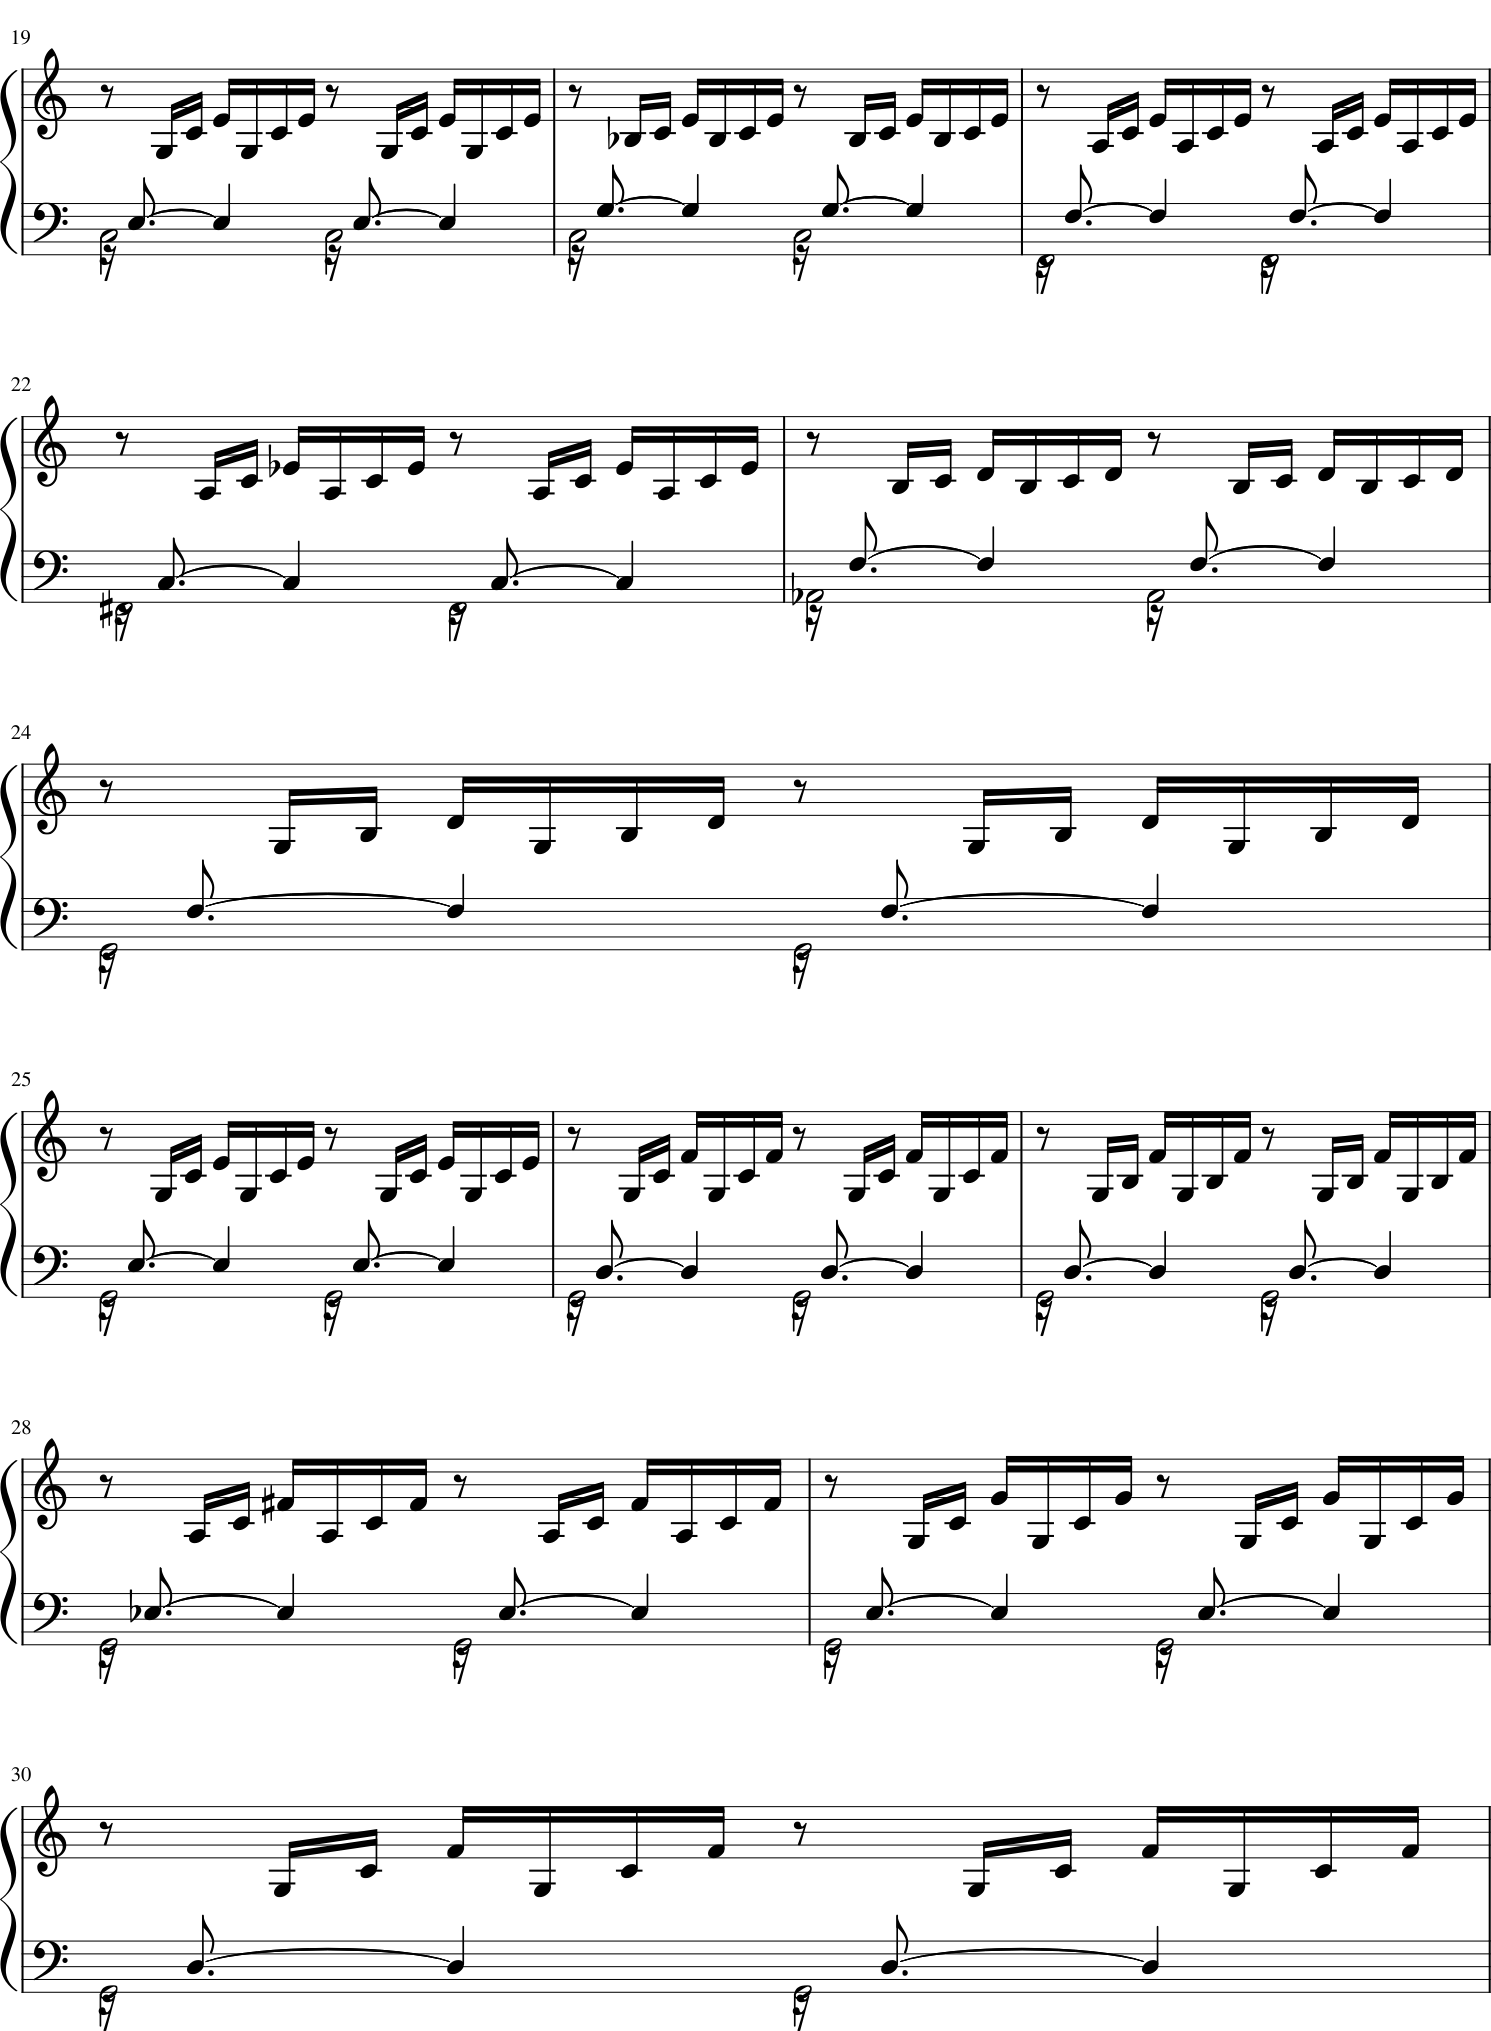

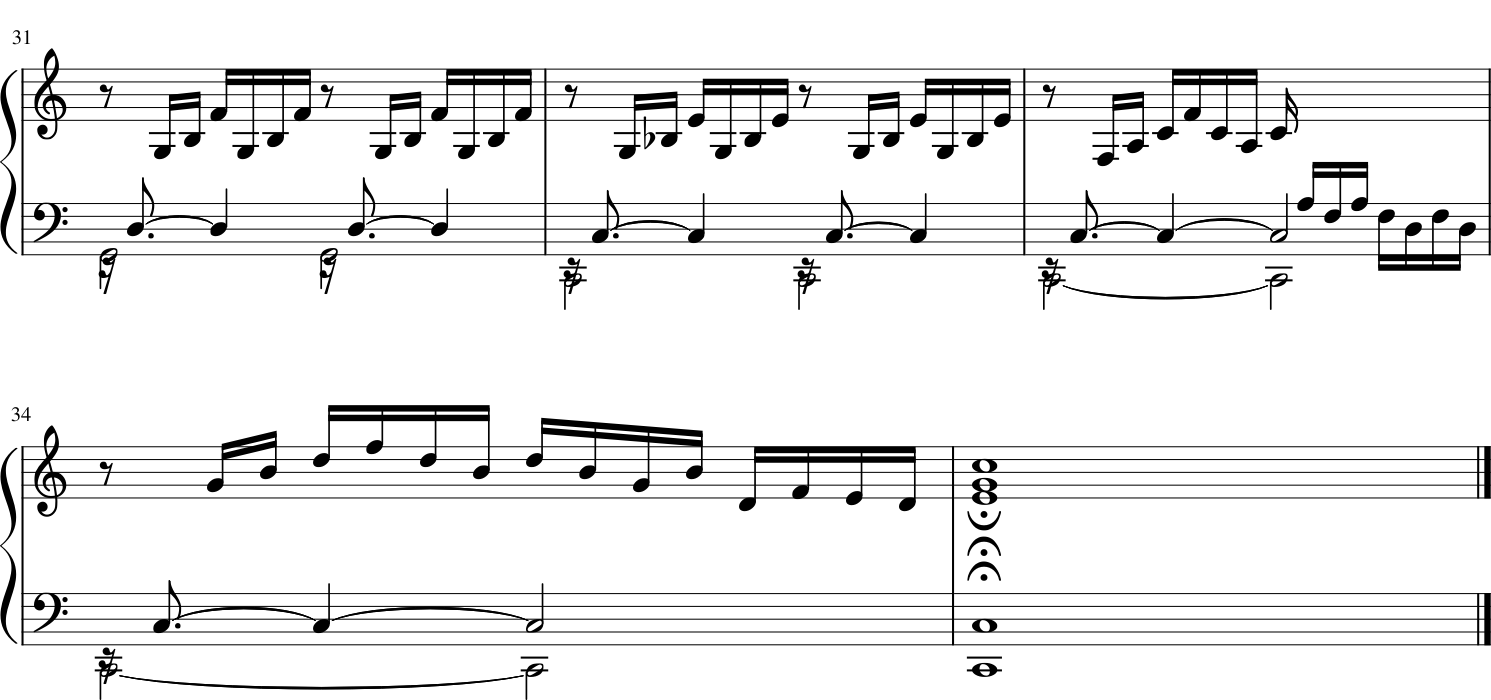

In [5]:
import pitchtypes as pt
from music21 import converter, stream, note, dynamics, spanner
import os
import pandas as pd
import copy

# Pull in the score and listen to it a bit
unperformed_score = converter.parse(f'{dependencies}bwv846.musicxml')
unperformed_score.show()
unperformed_score.show('midi')

In [6]:
# first note emphasis with diminuendo

def first_emphasis_dim(unperformed_score):
  score = copy.deepcopy(unperformed_score)
  bass = score.parts[1]
  treble = score.parts[0]

  for i in range(1, len(treble)):
    b = bass.measure(i)
    t = treble.measure(i)
    if i != len(treble)-1 and i != len(treble)-2 and i != len(treble)-3:
      b.insert(0, dynamics.Dynamic('p'))
      b.insert(0.25, dynamics.Dynamic('pp'))
      b.insert(2, dynamics.Dynamic('p'))
      b.insert(2.25, dynamics.Dynamic('pp'))

      t.insert(0.25, dynamics.Dynamic('pp'))
      t.insert(2.25, dynamics.Dynamic('pp'))

      j = 0
      while not isinstance(t[j], note.Rest):
        j += 1
      j += 1
      d1 = dynamics.Diminuendo()
      d1.addSpannedElements(t[j], t[j+6])

      while not isinstance(t[j], note.Rest):
        j += 1
      j += 1
      d2 = dynamics.Diminuendo()
      d2.addSpannedElements(t[j], t[j+6])

      t.insert(0, d1)
      t.insert(2, d2)

    return score

In [7]:
# first note emphasis without diminuendo

def first_emphasis(unperformed_score):
  score = copy.deepcopy(unperformed_score)
  bass = score.parts[1]
  treble = score.parts[0]
  for i in range(1, len(treble)):
    b = bass.measure(i)
    t = treble.measure(i)


    if i != len(treble)-1 and i != len(treble) - 2 and i != len(treble) - 3:
      b.insert(0, dynamics.Dynamic('p'))
      b.insert(0.25, dynamics.Dynamic('pp'))
      b.insert(2, dynamics.Dynamic('p'))
      b.insert(2.25, dynamics.Dynamic('pp'))

      t.insert(0.25, dynamics.Dynamic('pp'))
      t.insert(2.25, dynamics.Dynamic('pp'))


  return score

In [8]:
# connect notes within a phrase
def connect_notes_within_phrase(unperformed_score):
  score = copy.deepcopy(unperformed_score)
  bass = score.parts[1]
  treble = score.parts[0]

  for i in range(1, len(treble)):
    b = bass.measure(i)
    t = treble.measure(i)

    if i != len(treble)-1:
      s1 = spanner.Slur([b[0], b[-1]])
      b.insert(0, s1)

      j = 0
      while not isinstance(t[j], note.Rest):
        j += 1
      j += 1

      s2 = spanner.Slur([t[j], t[-1]])
      t.insert(j, s2)

  return score

# connect_notes_within_phrase(unperformed_score).show()

# connect_notes_within_phrase(unperformed_score).show('midi')

In [9]:
def ending(unperformed_score):
  score = copy.deepcopy(unperformed_score)
  bass = score.parts[1]
  treble = score.parts[0]
  # third to last measure
  b = bass.measure(len(treble)-3)
  t = treble.measure(len(treble)-3)
  b.insert(0, dynamics.Dynamic('p'))
  b.insert(0.25, dynamics.Dynamic('pp'))
  t.insert(0.25, dynamics.Dynamic('pp'))

  # second to last measure
  b = bass.measure(len(treble)-2)
  t = treble.measure(len(treble)-2)
  b.insert(0, dynamics.Dynamic('p'))
  b.insert(0.25, dynamics.Dynamic('pp'))
  t.insert(0.25, dynamics.Dynamic('pp'))
  j = 0
  while not isinstance(t[j], note.Rest):
    j += 1
  j += 1
  c = dynamics.Crescendo()
  c.addSpannedElements(t[j], t[j+2])
  d = dynamics.Diminuendo()
  d.addSpannedElements(t[j+3], t[-1])
  t.insert(0, c)
  t.insert(0.25, d)

  # last measure
  b = bass.measure(len(treble)-1)
  t = treble.measure(len(treble)-1)
  b.insert(0, dynamics.Dynamic('ppp'))
  t.insert(0, dynamics.Dynamic('ppp'))

  return score


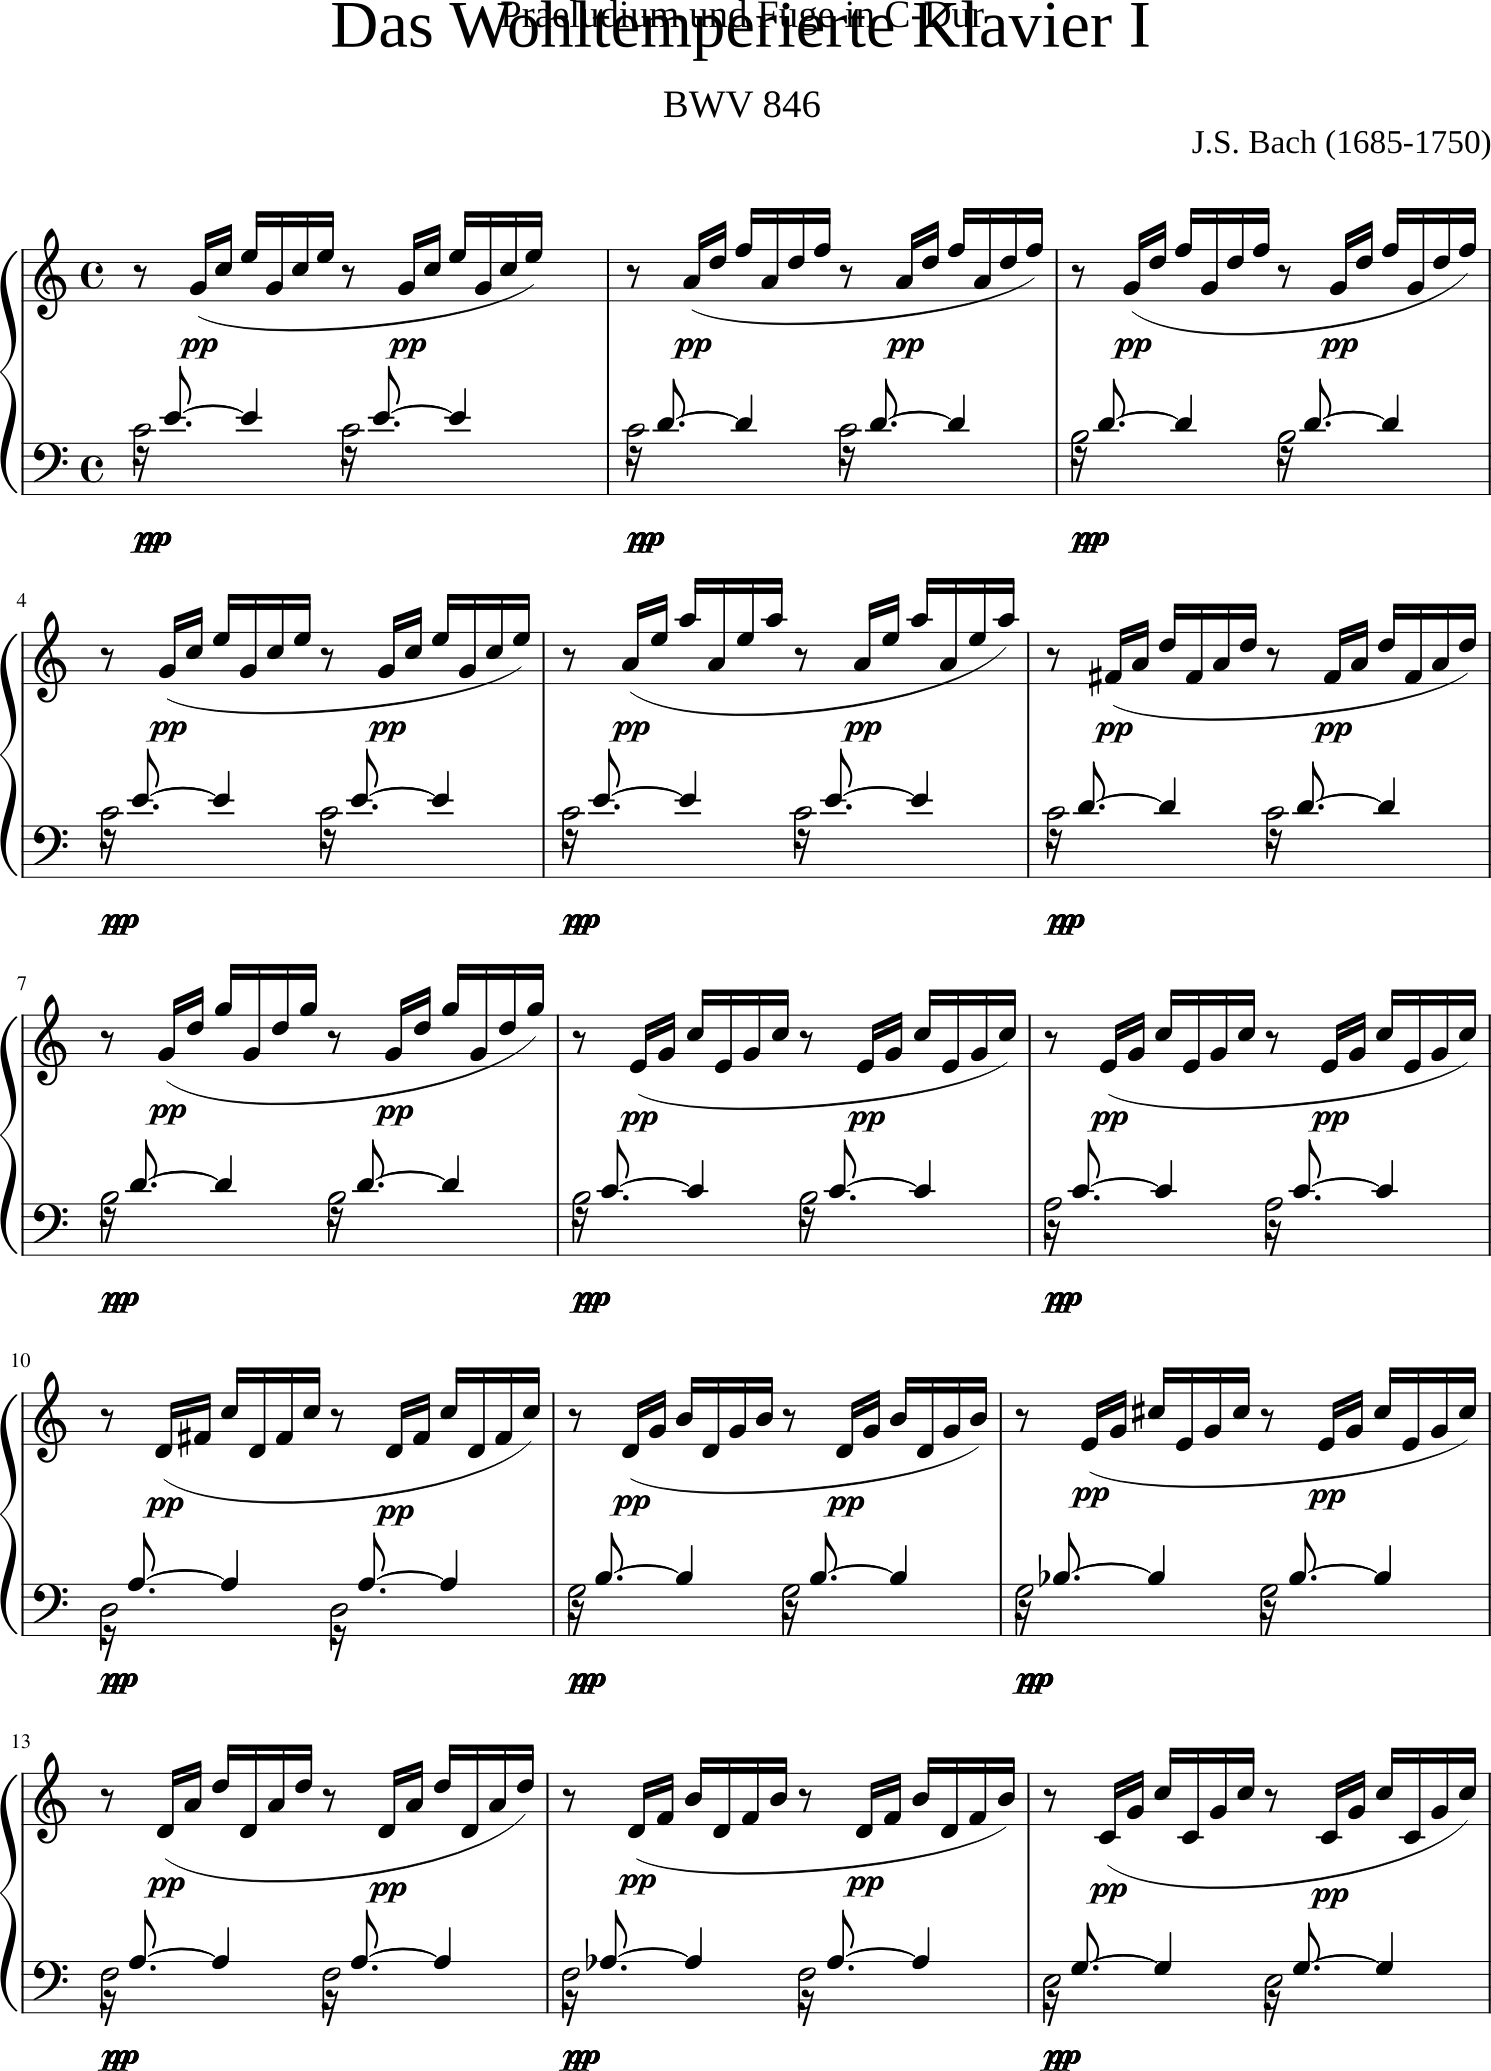

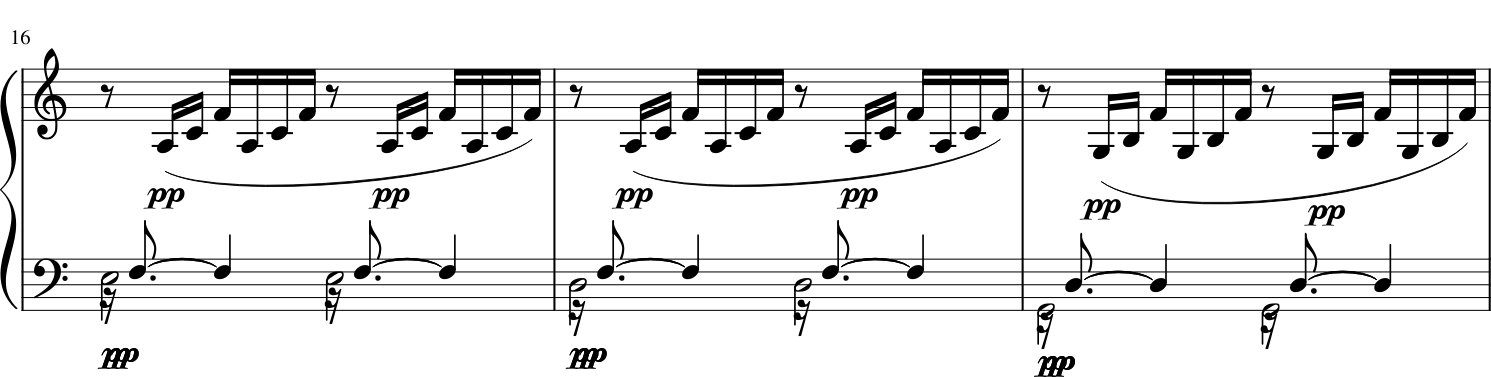

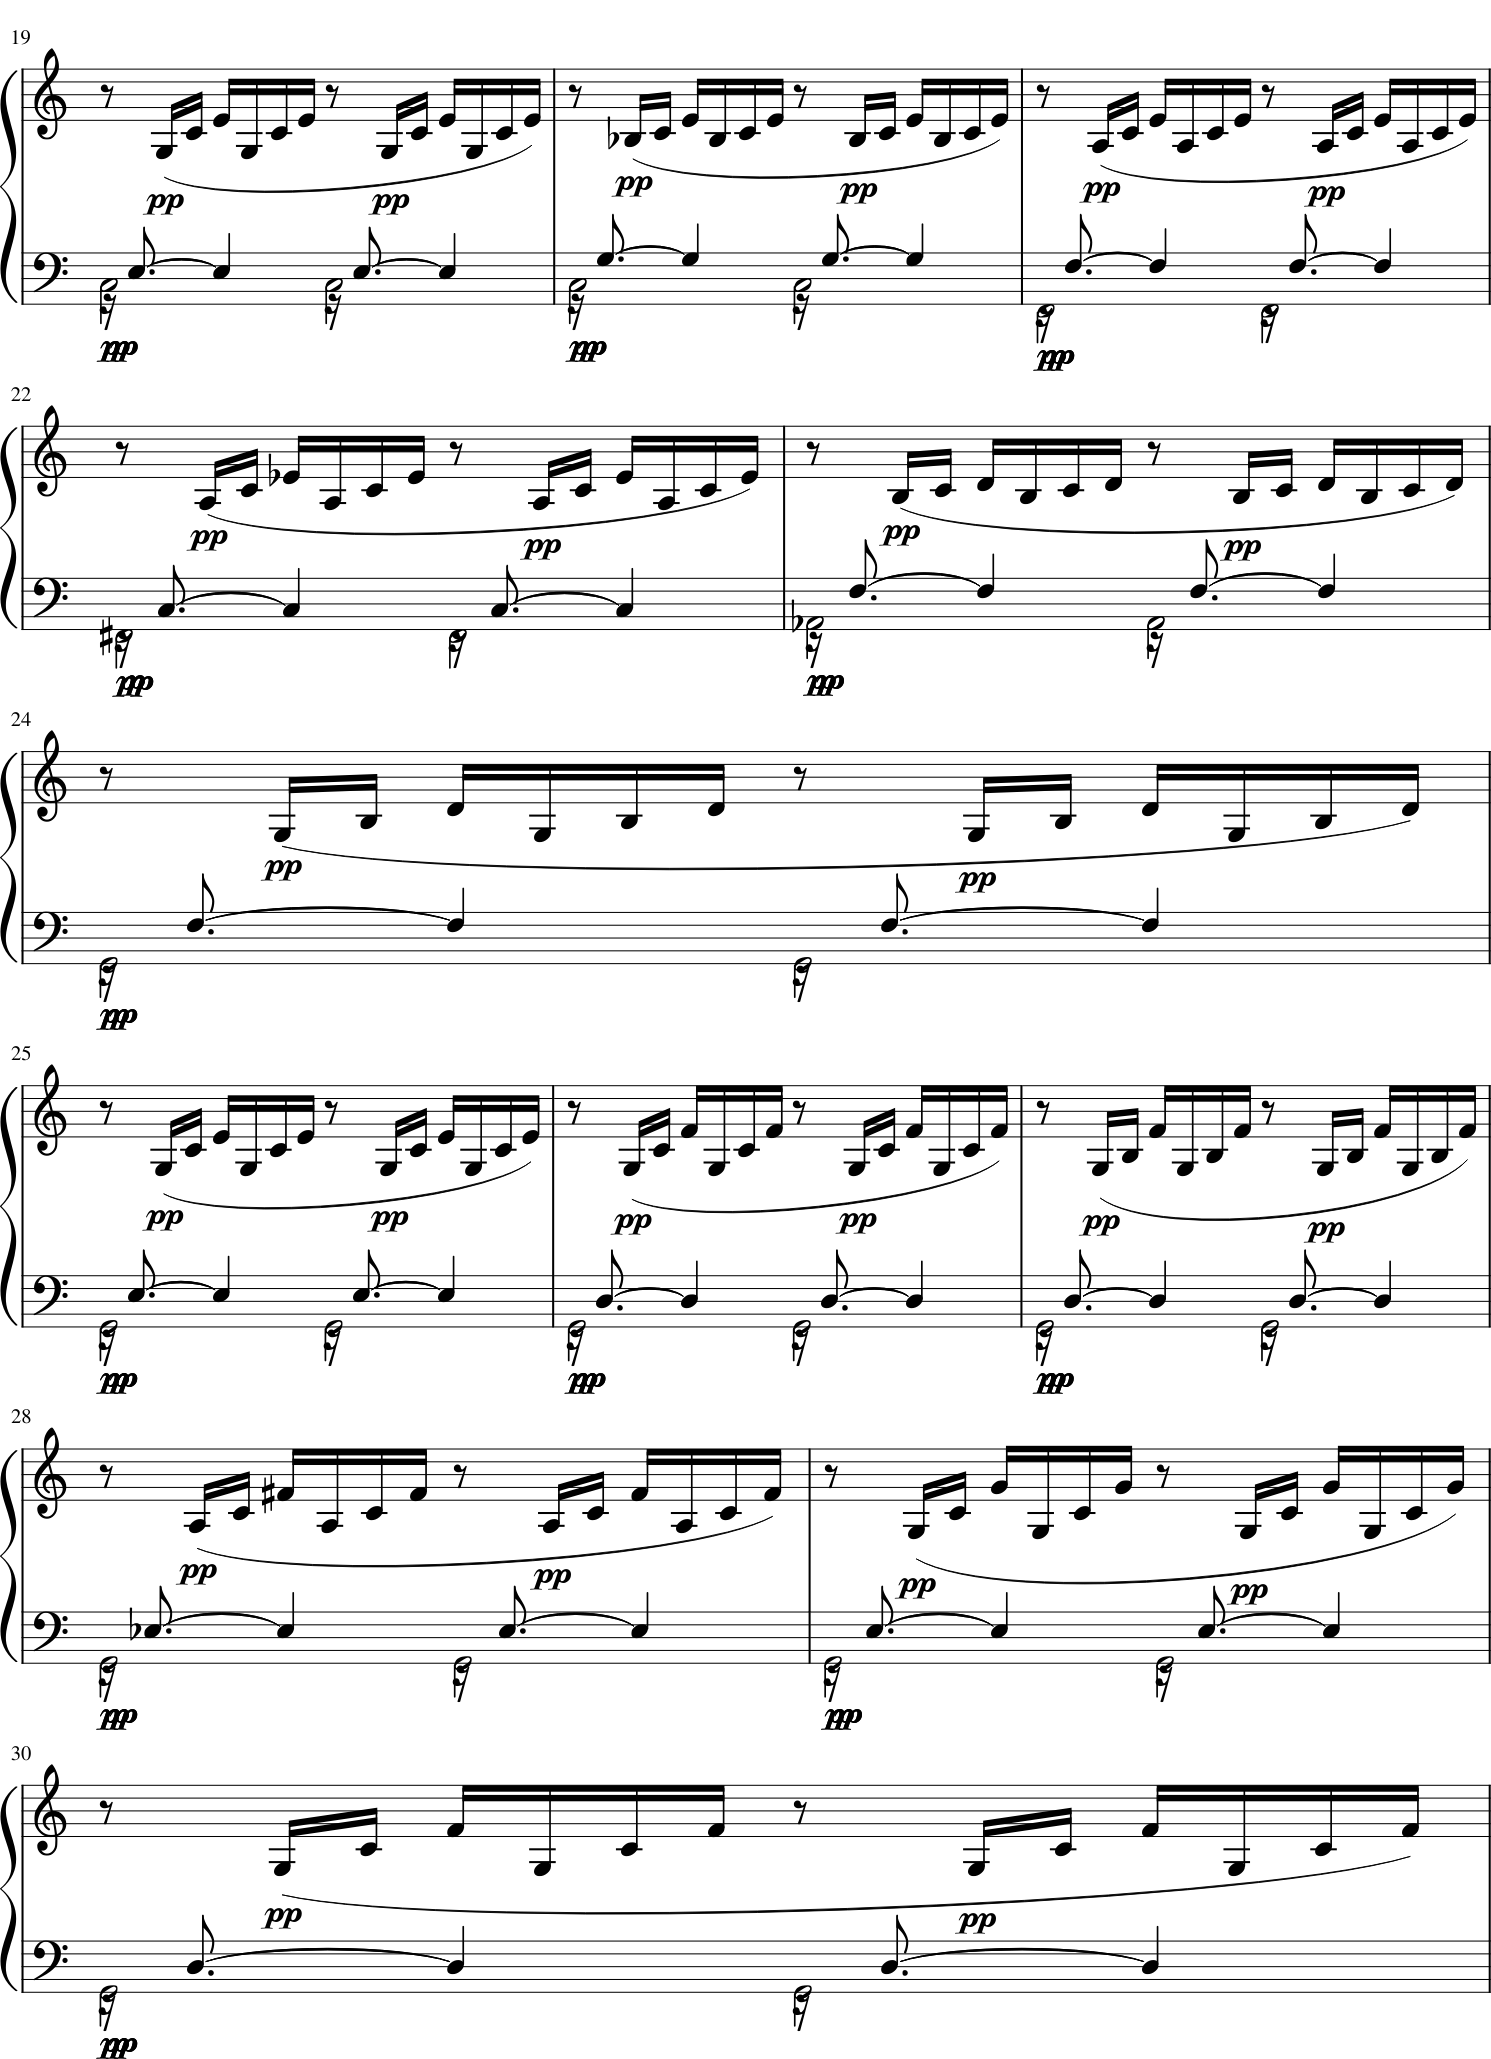

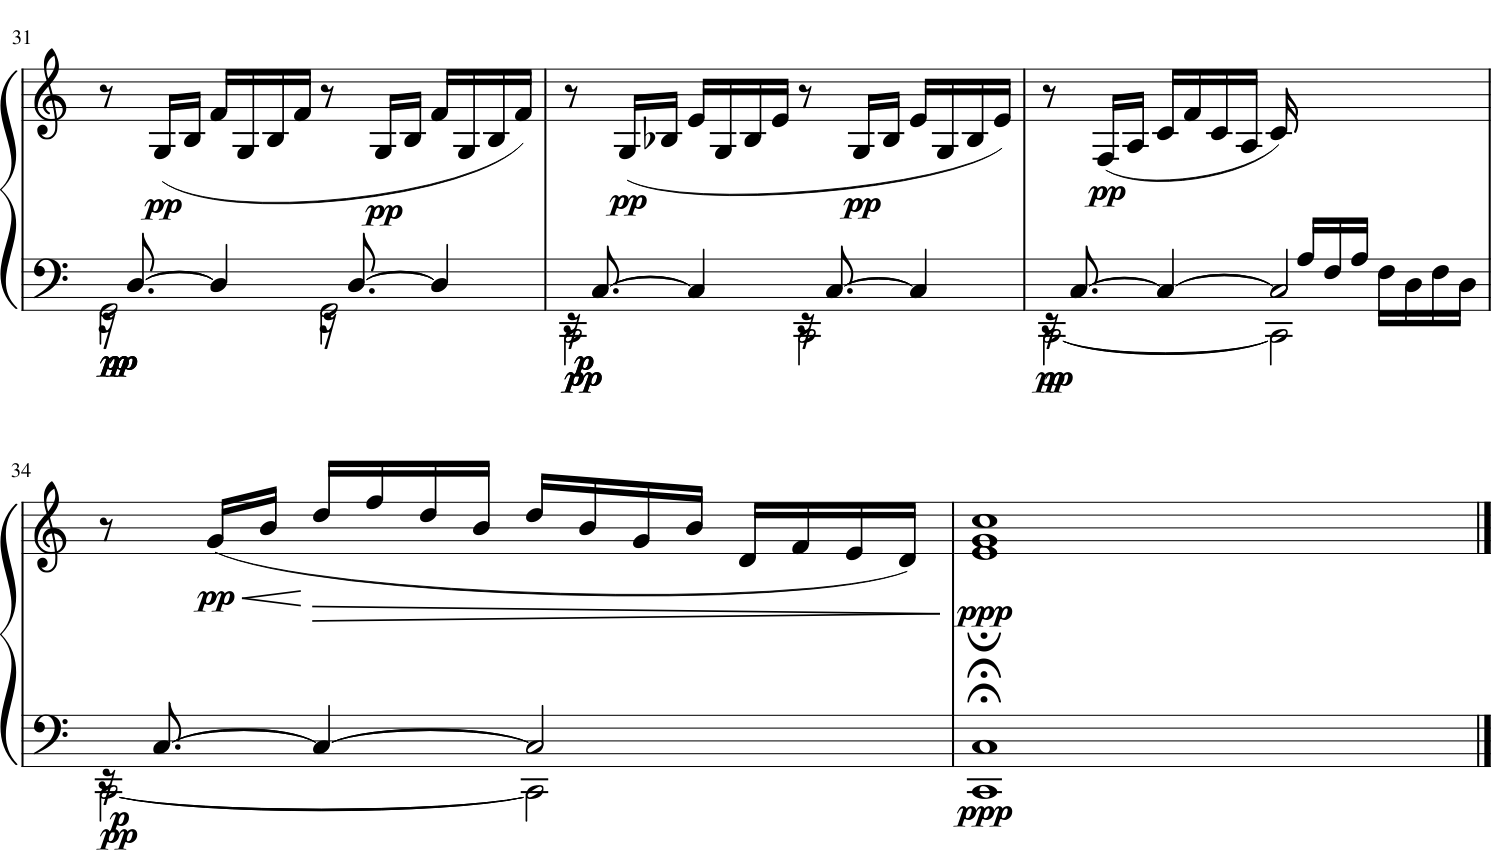

PosixPath('/content/drive/MyDrive/final.musicxml')

In [10]:
score = connect_notes_within_phrase(unperformed_score)
score = first_emphasis(score)
score = ending(score)

score.show()
score.write('musicxml', 'drive/MyDrive/final.musicxml')
